In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import sqlite3
from IMD2SQL import dbPath
import matplotlib.pyplot as plt


In [2]:
def burglaryDF() -> pd.DataFrame:
    conn = sqlite3.connect(dbPath())
    burglary_query = """SELECT *
    FROM table_name
    WHERE [Crime type] = "Burglary"
    """
    df = pd.read_sql_query(burglary_query, conn)
    conn.close()
    return df

def imd2015DF() -> pd.DataFrame:
    conn = sqlite3.connect(dbPath())
    get2015 = """
    SELECT *
    FROM IOD_feature_code_score_15
    """
    df = pd.read_sql_query(get2015, conn)
    conn.close()
    return df

def imd2019DF() -> pd.DataFrame:
    conn = sqlite3.connect(dbPath())
    get2019 = """
    SELECT *
    FROM IOD_feature_code_score_19
    """
    df = pd.read_sql_query(get2019, conn)
    conn.close()
    return df




In [3]:
burglary = burglaryDF()
iod15 = imd2015DF()
iod15.set_index(["LSOA Code"],inplace=True)
iod19 = imd2019DF()
iod19.set_index(["LSOA Code"], inplace=True)

In [4]:
crime_count = burglary.groupby("LSOA code").count()["Month"]


In [5]:
merged15 = pd.merge(iod15,crime_count, left_index=True, right_index=True)
merged19 = pd.merge(iod19,crime_count, left_index=True, right_index=True)

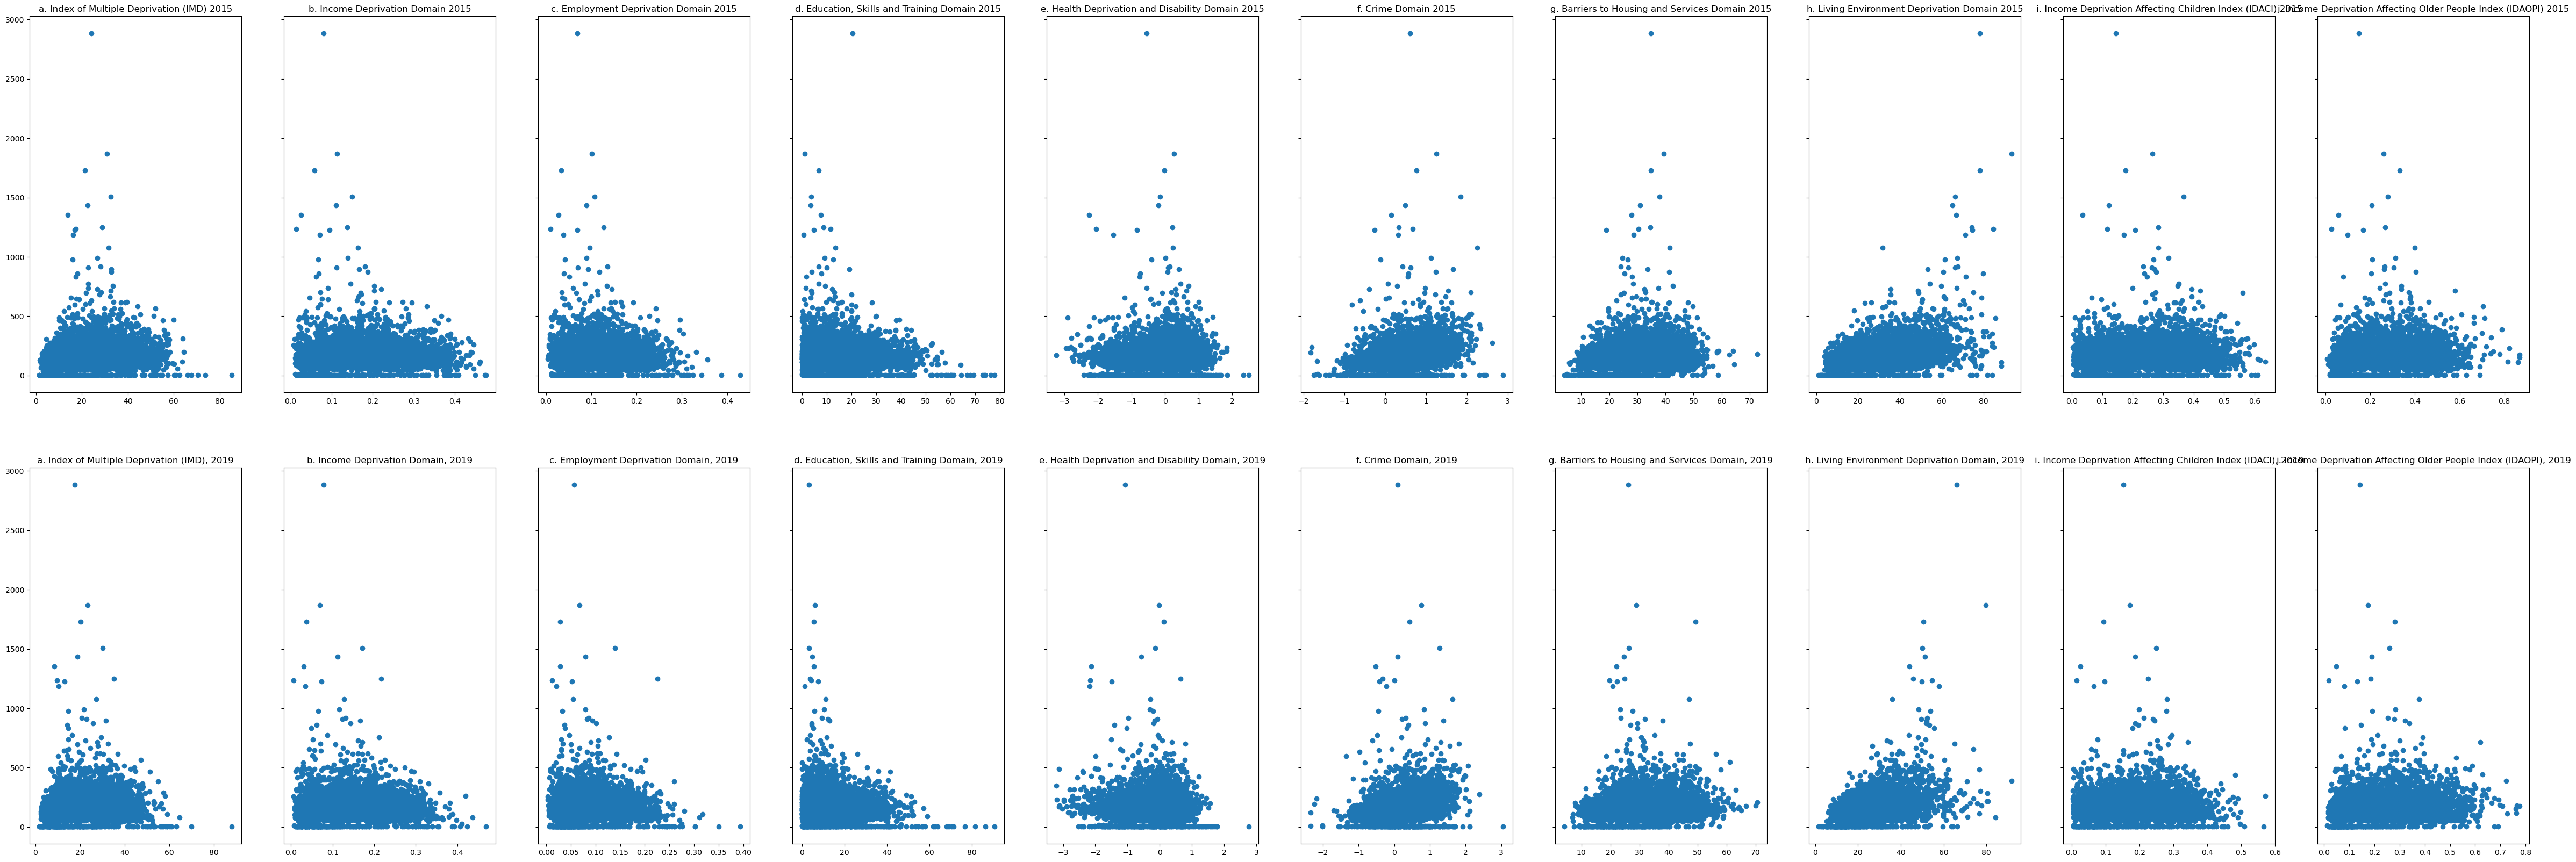

In [9]:
# pd.plotting.scatter_matrix(merged, figsize=(50,50));
fig, ax = plt.subplots(2,10, sharey=True, figsize= (60,20))
for i, col in enumerate(iod15.columns):
    ax[0, i].scatter(merged15[col], merged15["Month"]);
    ax[0, i].set_title(f"{col} 2015")
    ax[1, i].scatter(merged19[col], merged19["Month"]);
    ax[1, i].set_title(f"{col}, 2019")

plt.show()